# Principal Component Analysis (PCA): PCA is a dimensionality reduction technique that can be used for feature selection

In [39]:
from sklearn.decomposition import PCA

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("IUBAT_Clean1.csv")

# Separate inputs and target variable
inputs = df.drop(['PMV_Level'], axis=1)
target = df['PMV_Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

# Apply SMOTE-ENN for balancing the classes after splitting
resampler = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=X_train_scaled.shape[1])
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the number of input features and number of classes
input_dim = X_train_pca.shape[1]
num_classes = len(np.unique(y_train_resampled))

# Define your model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with early stopping
history_pca = model.fit(X_train_pca, y_train_resampled, validation_data=(X_test_pca, y_test), epochs=100, callbacks=[early_stop])

# Evaluate the model on the test set
y_pred = model.predict(X_test_pca)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

Epoch 1/100


C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2417 - loss: 1.8520 - val_accuracy: 0.4656 - val_loss: 1.5789
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6153 - loss: 1.2798 - val_accuracy: 0.5878 - val_loss: 1.2110
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7232 - loss: 0.9145 - val_accuracy: 0.6679 - val_loss: 0.9867
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7717 - loss: 0.7224 - val_accuracy: 0.7137 - val_loss: 0.8978
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8141 - loss: 0.6053 - val_accuracy: 0.7481 - val_loss: 0.8154
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8539 - loss: 0.4829 - val_accuracy: 0.7595 - val_loss: 0.7802
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8699 - loss: 0.4363 - val_accuracy: 0.7748 - val_loss: 0.7249
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8808 - loss: 0.3791 - val_accuracy: 0.7824 - val_loss: 0.

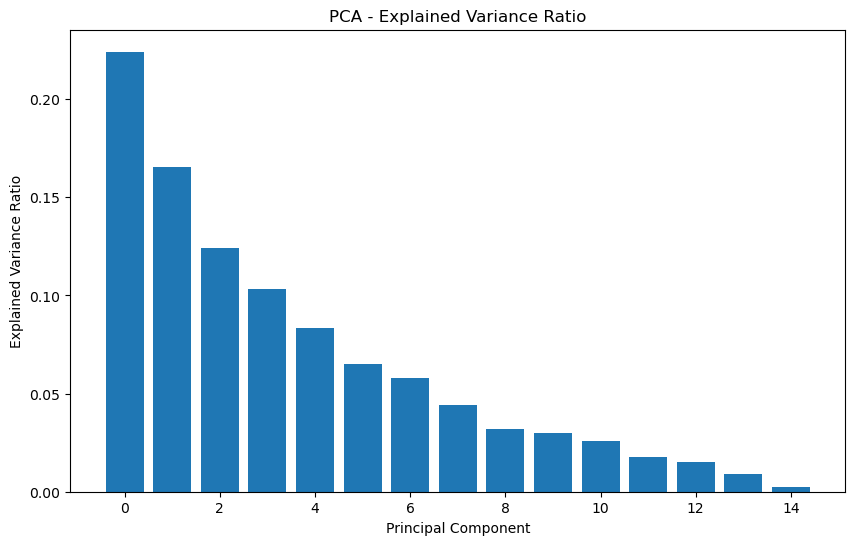

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=input_dim)
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(input_dim), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance Ratio')
plt.show()

In [85]:
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=input_dim)
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Display the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance Ratio for Component {i+1}: {ratio:.4f}")

Explained Variance Ratio for Component 1: 0.2242
Explained Variance Ratio for Component 2: 0.1654
Explained Variance Ratio for Component 3: 0.1242
Explained Variance Ratio for Component 4: 0.1033
Explained Variance Ratio for Component 5: 0.0834
Explained Variance Ratio for Component 6: 0.0652
Explained Variance Ratio for Component 7: 0.0581
Explained Variance Ratio for Component 8: 0.0441
Explained Variance Ratio for Component 9: 0.0321
Explained Variance Ratio for Component 10: 0.0297
Explained Variance Ratio for Component 11: 0.0259
Explained Variance Ratio for Component 12: 0.0177
Explained Variance Ratio for Component 13: 0.0149
Explained Variance Ratio for Component 14: 0.0093
Explained Variance Ratio for Component 15: 0.0025


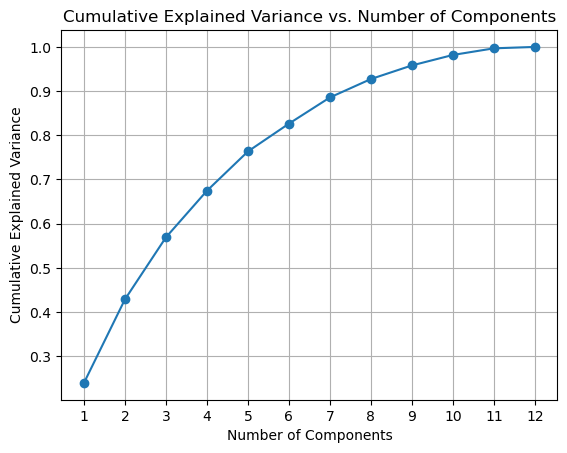

In [86]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance_ratios = [0.2395, 0.1891, 0.1404, 0.1054, 0.0890, 0.0629, 0.0593, 0.0417, 0.0308, 0.0237, 0.0150, 0.0032,]

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratios)

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.show()

In [87]:
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_scaled)

# Get the loadings matrix
loadings = pca.components_

# Get the original feature names
feature_names = X_train.columns  # Replace X_train with your original dataset

# Print the feature combinations for each principal component
for i, component in enumerate(loadings):
    print(f"Principal Component {i+1}:")
    for j, feature in enumerate(component):
        feature_name = feature_names[j]
        print(f"{feature_name}: {feature:.4f}")
    print()

Principal Component 1:
Gender: 0.1195
Age: 0.3395
Study_Level: 0.3656
Floor_Level: -0.1660
Room_Orientation: 0.2539
No_Lights: 0.3364
No_Fans: -0.1043
No_Windows: 0.2471
No_Doors: 0.2927
Floor_Area: 0.3796
Distan_Windows: 0.0994
Temperature_(°C): 0.2791
Humidity_(%): 0.2137
CO2_(PPM): 0.2915
Lighting_Level: 0.1069

Principal Component 2:
Gender: -0.0531
Age: 0.0814
Study_Level: 0.1148
Floor_Level: 0.0458
Room_Orientation: -0.0702
No_Lights: -0.3044
No_Fans: -0.4666
No_Windows: -0.1466
No_Doors: -0.2843
Floor_Area: -0.2192
Distan_Windows: 0.0307
Temperature_(°C): 0.4468
Humidity_(%): -0.1410
CO2_(PPM): 0.4934
Lighting_Level: -0.2139

Principal Component 3:
Gender: 0.4071
Age: -0.2792
Study_Level: -0.2915
Floor_Level: 0.2716
Room_Orientation: 0.1161
No_Lights: -0.0112
No_Fans: -0.0702
No_Windows: 0.4861
No_Doors: 0.0963
Floor_Area: 0.0171
Distan_Windows: 0.3054
Temperature_(°C): 0.1146
Humidity_(%): -0.4448
CO2_(PPM): 0.0947
Lighting_Level: 0.1412

Principal Component 4:
Gender: -0.2718


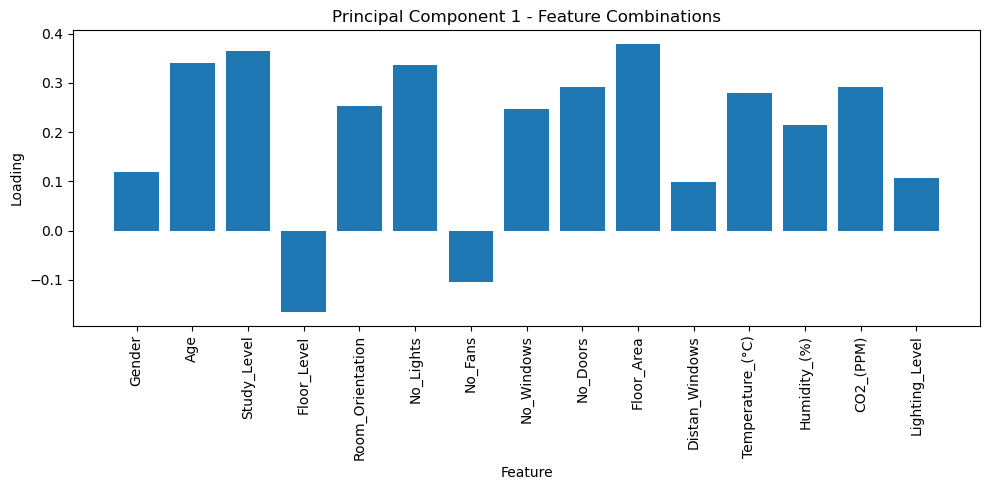

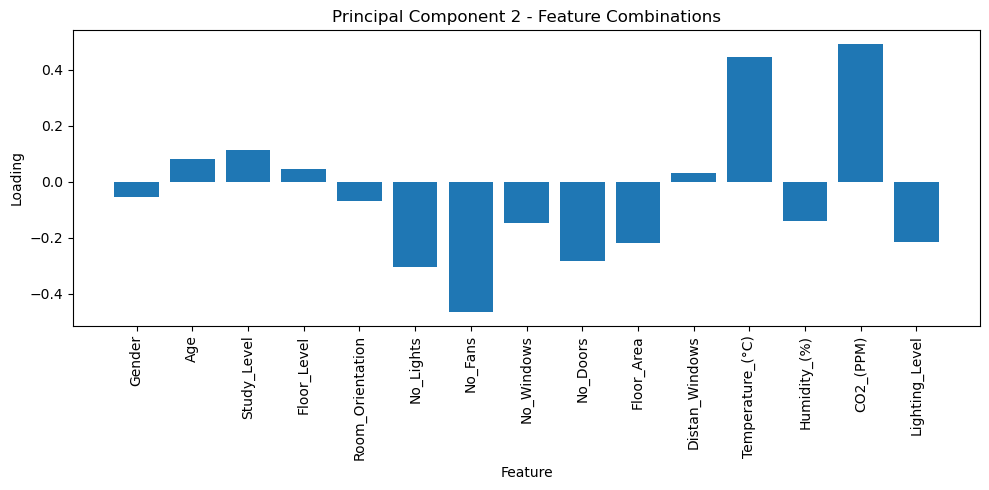

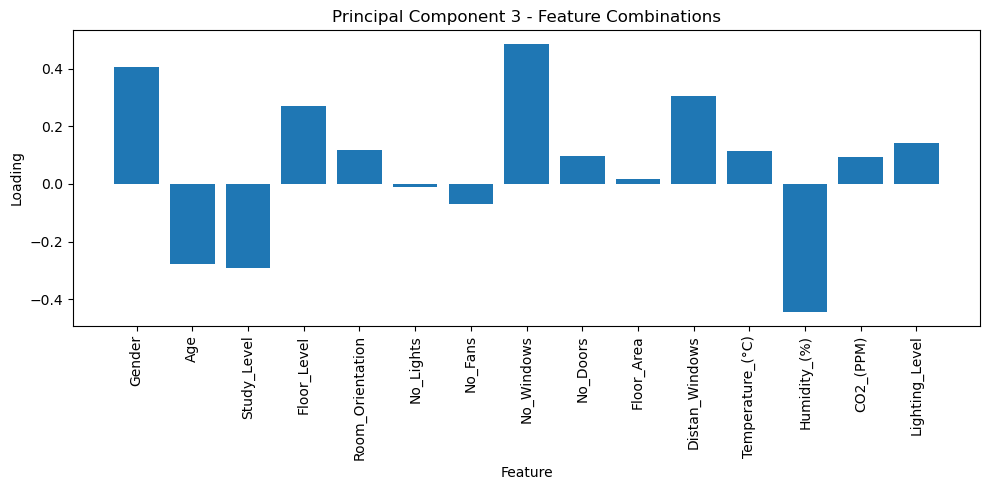

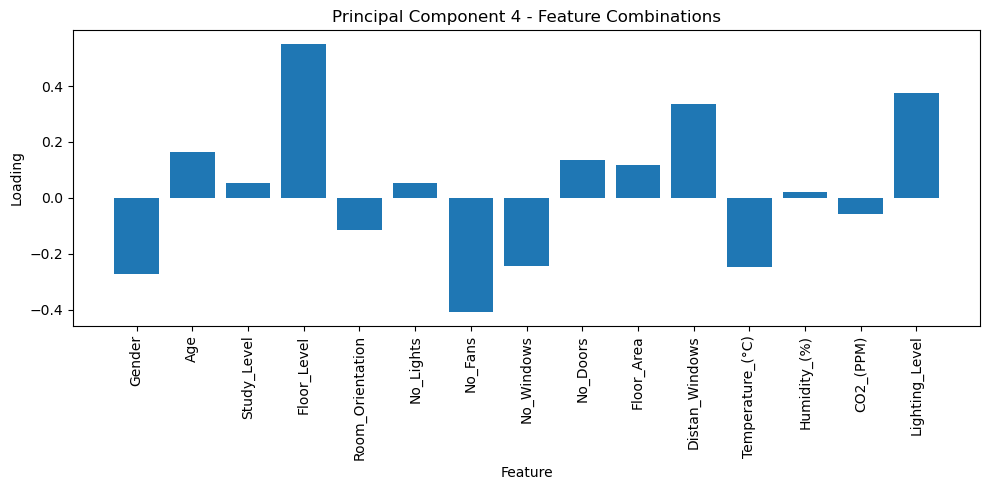

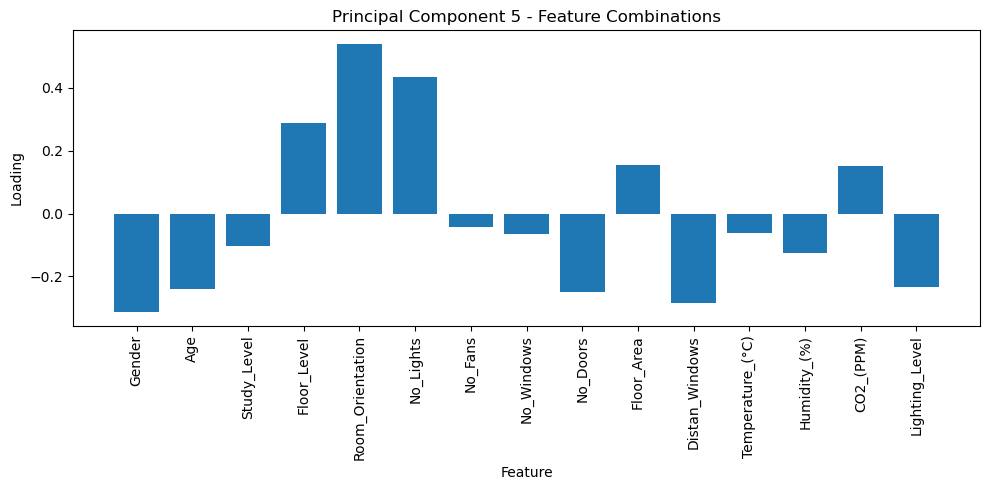

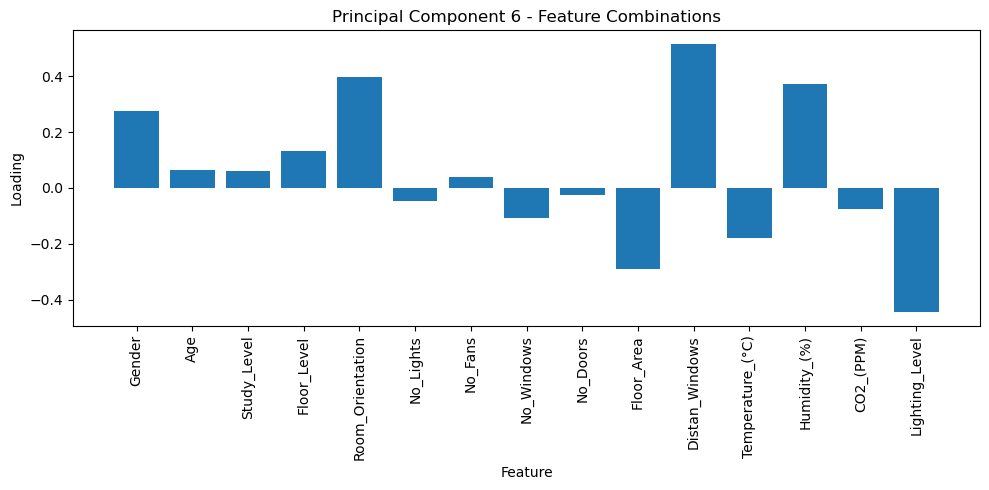

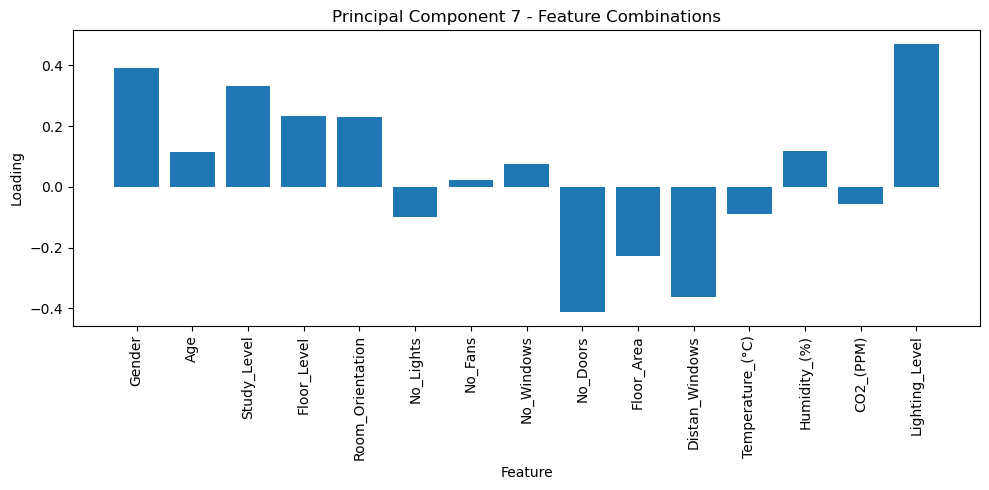

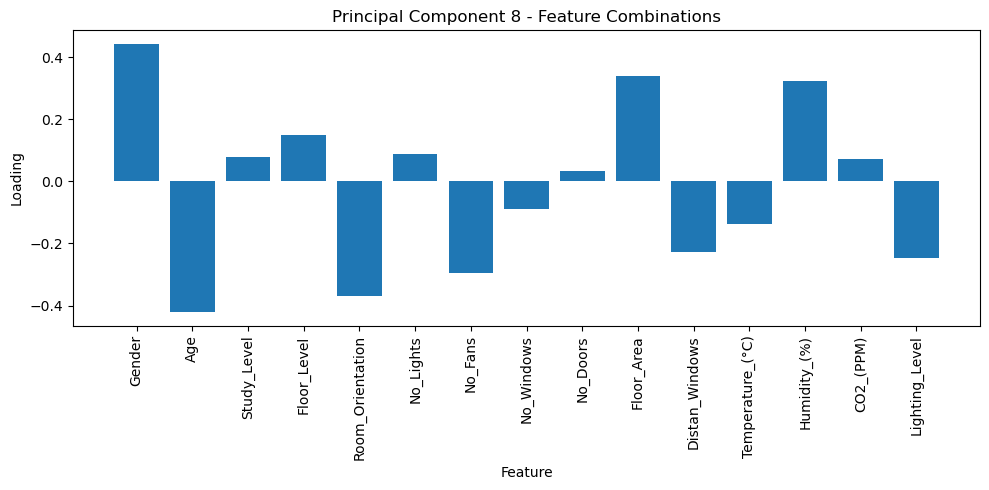

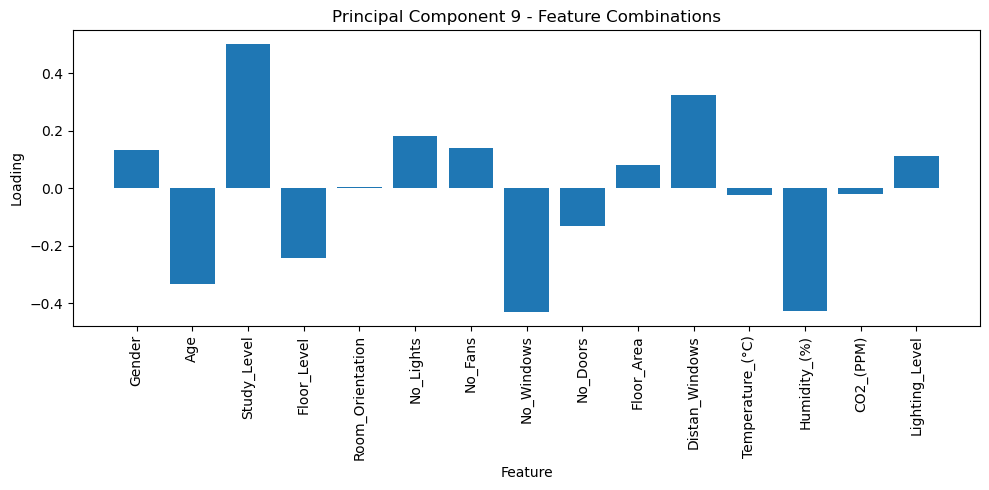

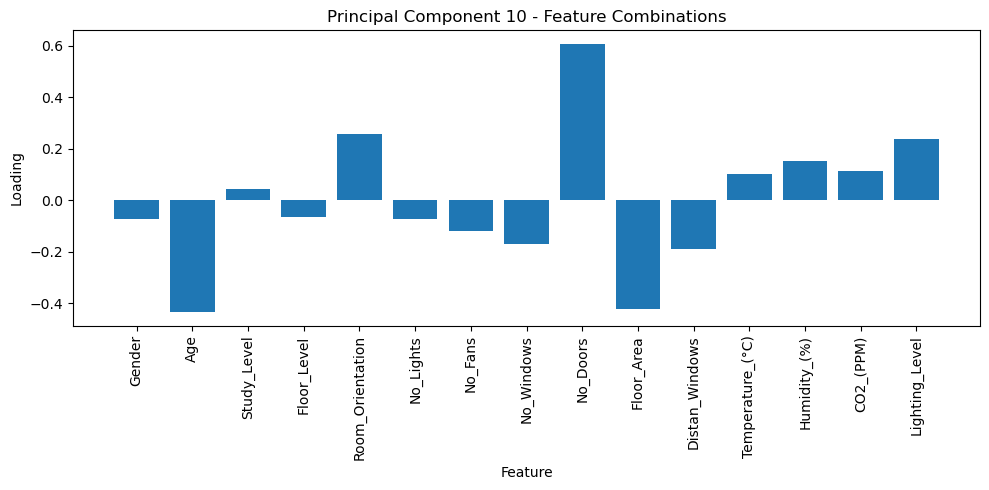

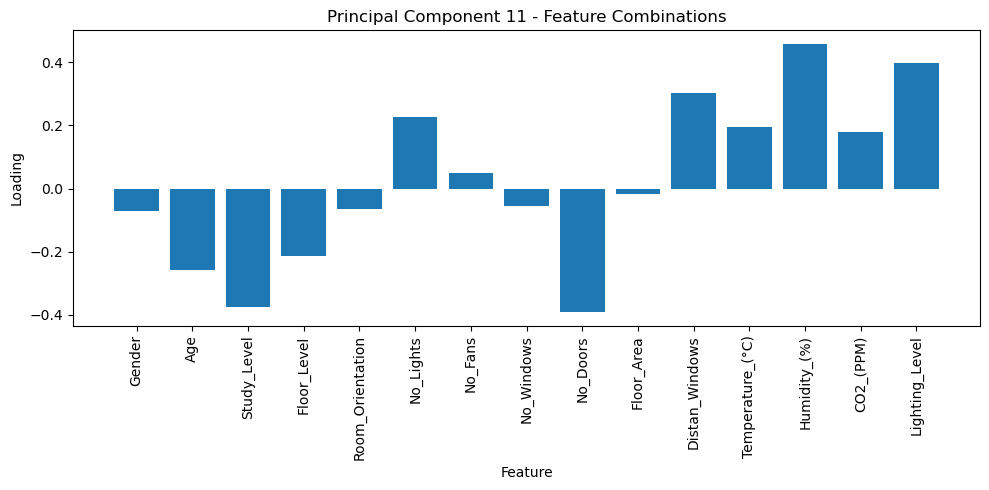

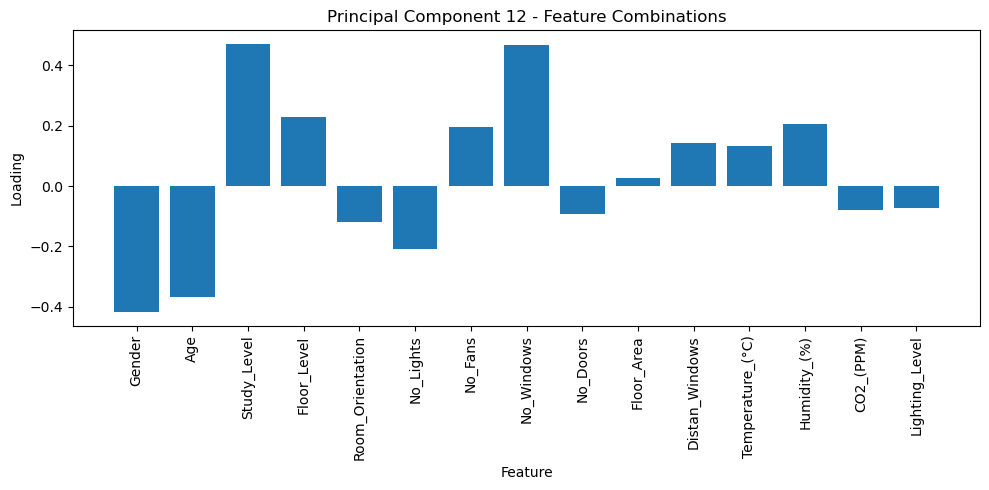

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_scaled)

# Get the loadings matrix
loadings = pca.components_

# Get the original feature names
feature_names = X_train.columns  # Replace X_train with your original dataset

# Create a bar plot for each principal component
for i, component in enumerate(loadings):
    plt.figure(figsize=(10, 5))
    plt.bar(feature_names, component)
    plt.xlabel('Feature')
    plt.ylabel('Loading')
    plt.title(f'Principal Component {i+1} - Feature Combinations')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

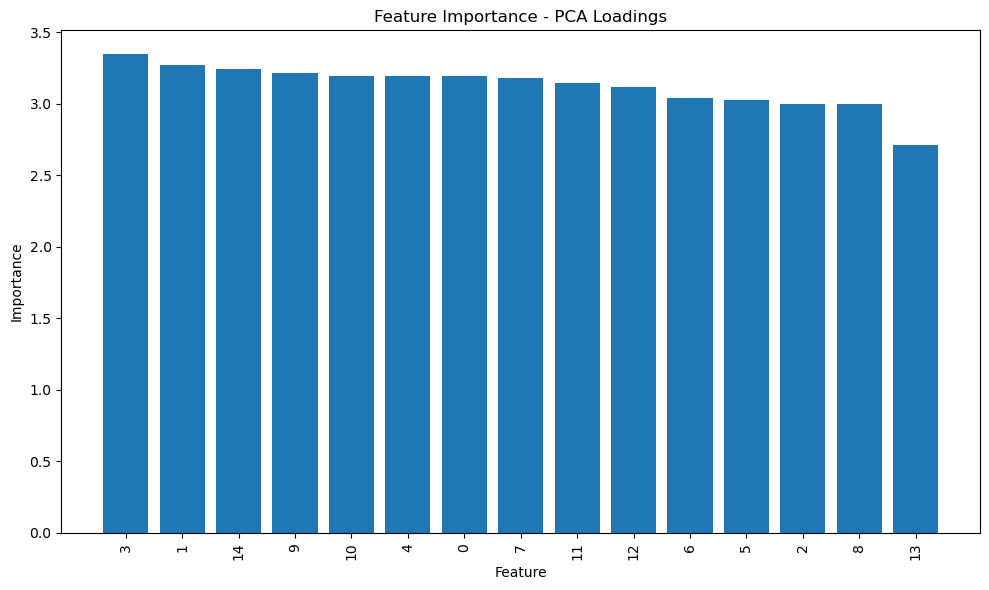

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=input_dim)
X_train_pca = pca.fit_transform(X_train_scaled)

# Get the loadings
loadings = pca.components_

# Calculate the absolute sum of loadings for each feature
feature_importance = np.abs(loadings).sum(axis=0)

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance)
plt.xticks(range(len(sorted_importance)), sorted_indices, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - PCA Loadings')
plt.tight_layout()
plt.show()

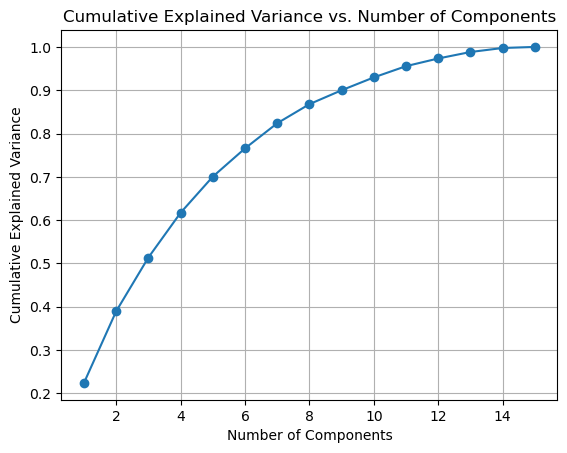

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

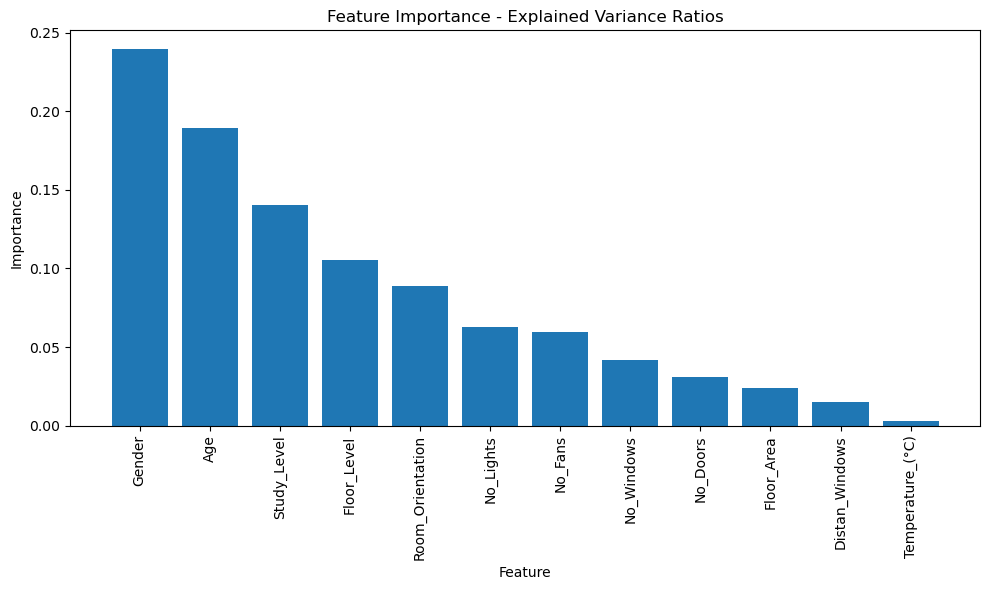

In [91]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance_ratios = [0.2395, 0.1891, 0.1404, 0.1054, 0.0890, 0.0629, 0.0593, 0.0417, 0.0308, 0.0237, 0.0150, 0.0032,]
sorted_indices = np.argsort(explained_variance_ratios)[::-1]
sorted_variances = np.array(explained_variance_ratios)[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_variances)), sorted_variances)
plt.xticks(range(len(sorted_variances)), sorted_feature_names, rotation=90)  # Update the x-axis labels
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Explained Variance Ratios')
plt.tight_layout()
plt.show()

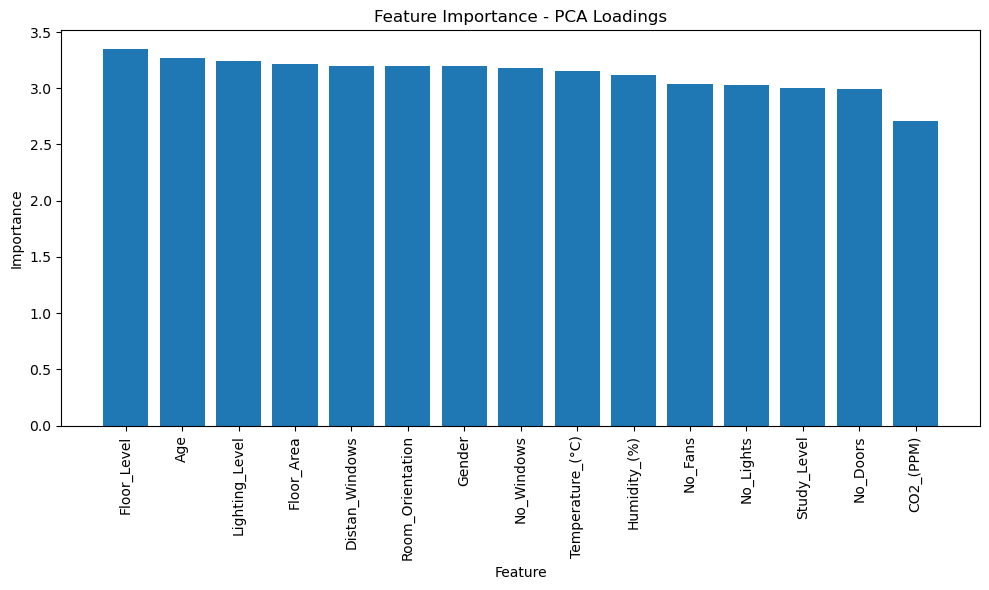

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=input_dim)
X_train_pca = pca.fit_transform(X_train_scaled)

# Get the loadings
loadings = pca.components_

# Calculate the absolute sum of loadings for each feature
feature_importance = np.abs(loadings).sum(axis=0)

# Create a list of feature names
feature_names = list(inputs.columns)

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance)
plt.xticks(range(len(sorted_importance)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - PCA Loadings')
plt.tight_layout()
plt.show()

In [93]:
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=input_dim)
X_train_pca = pca.fit_transform(X_train_scaled)

# Get the loadings
loadings = pca.components_

# Calculate the absolute sum of loadings for each feature
feature_importance = np.abs(loadings).sum(axis=0)

# Create a list of feature names
feature_names = list(inputs.columns)

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Print the feature importances
print("Feature Importance - PCA Loadings:")
for feature, importance in zip(sorted_feature_names, sorted_importance):
    print(f"{feature}: {importance:.4f}")

Feature Importance - PCA Loadings:
Floor_Level: 3.3475
Age: 3.2705
Lighting_Level: 3.2440
Floor_Area: 3.2155
Distan_Windows: 3.1988
Room_Orientation: 3.1961
Gender: 3.1954
No_Windows: 3.1824
Temperature_(°C): 3.1496
Humidity_(%): 3.1210
No_Fans: 3.0417
No_Lights: 3.0279
Study_Level: 3.0018
No_Doors: 2.9966
CO2_(PPM): 2.7112


In [94]:
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=input_dim)
X_train_pca = pca.fit_transform(X_train_scaled)

# Get the loadings
loadings = pca.components_

# Calculate the absolute sum of loadings for each feature
feature_importance = np.abs(loadings).sum(axis=0)

# Create a list of feature names
feature_names = list(inputs.columns)

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Get the feature values for each feature
feature_values = X_train_scaled.mean(axis=0)

# Create a formatted list of feature values
formatted_feature_values = [f"{value:.2f}" for value in feature_values]

# Create hovertext combining feature name, importance, and value
hovertext = [
    f"Importance: {imp:.2f}<br>Value: {val:.2f}"
    for imp, val in zip(sorted_importance, feature_values)
]

# Create an interactive horizontal bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(
        x=sorted_importance,
        y=sorted_feature_names,
        orientation='h',
        hovertext=hovertext,
        hovertemplate="%{y}<br>%{hovertext}<extra></extra>",
    )
])

fig.update_layout(
    title='Feature Importance - PCA Loadings',
    xaxis_title='Importance',
    yaxis_title='Feature',
    yaxis=dict(autorange="reversed")
)

fig.show()
# Save the plot as an HTML file
fig.write_html("plot.html")

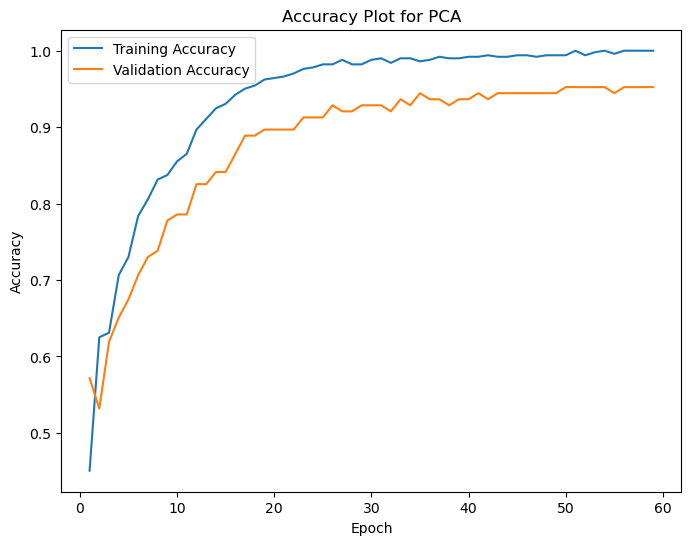

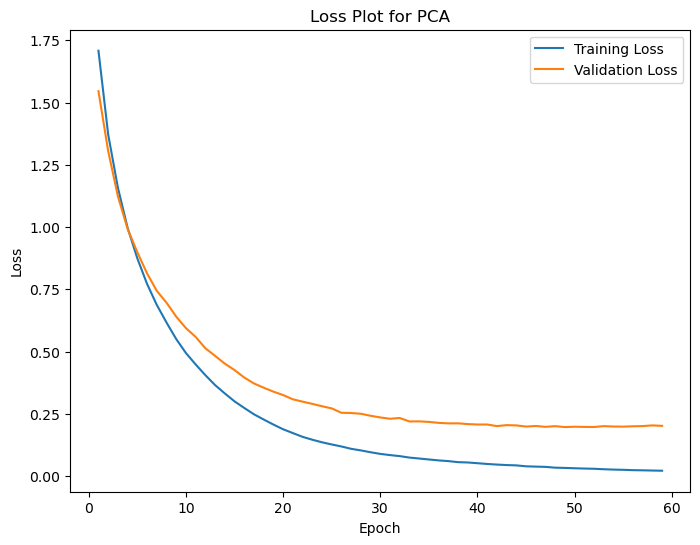

In [127]:
import matplotlib.pyplot as plt

# Get accuracy and loss values from the training history
accuracy = history_pca.history['accuracy']
val_accuracy = history_pca.history['val_accuracy']
loss = history_pca.history['loss']
val_loss = history_pca.history['val_loss']

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Plot for PCA')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss Plot for PCA')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# In this code, PCA is applied to the scaled training data using pca.fit_transform(X_train_scaled). The explained_variance_ratio_ attribute of the PCA object provides the ratio of variance explained by each principal component. A bar plot is then created to visualize the explained variance ratio for each principal component.

The higher the explained variance ratio for a principal component, the more important the corresponding original features are in capturing the data's variability. You can consider the principal components with higher explained variance ratios as more important features.

Keep in mind that PCA is a dimensionality reduction technique, and the principal components are linear combinations of the original features. Therefore, interpreting the feature importance directly from PCA components may not provide clear insights into the original feature's specific importance. Instead, it helps identify the most informative combinations of features in terms of capturing the data's variability.

# Information Gain or Mutual Information (Feature Selection)

In [128]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd

# Apply feature selection using Mutual Information
selector = SelectKBest(score_func=mutual_info_classif, k=15)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names and scores of the selected features
selected_features = X.columns[selected_indices]
feature_scores = selector.scores_[selected_indices]

# Create a DataFrame to display feature information
feature_info = pd.DataFrame({'Feature': selected_features, 'Score': feature_scores})
feature_info = feature_info.sort_values('Score', ascending=False).reset_index(drop=True)
print(feature_info)

C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning:

k=15 is greater than n_features=12. All the features will be returned.



             Feature     Score
0            No_Fans  0.514888
1     Distan_Windows  0.386449
2         Floor_Area  0.358456
3           No_Doors  0.291379
4          No_Lights  0.254043
5             Gender  0.232127
6   Room_Orientation  0.228591
7         No_Windows  0.204481
8            Room_No  0.181028
9                Age  0.131770
10  Temperature_(°C)  0.089827
11       Study_Level  0.081639


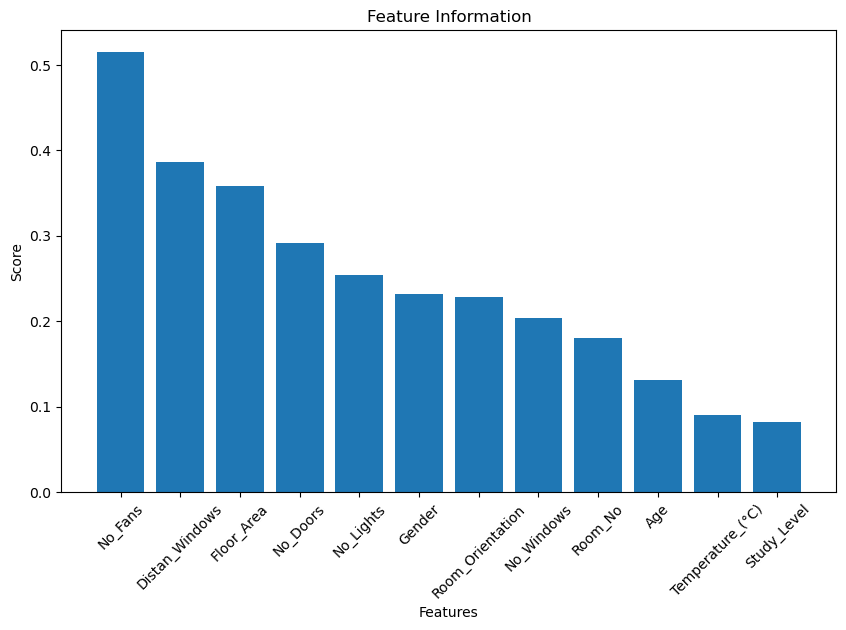

In [129]:
import matplotlib.pyplot as plt

# Plotting feature information
plt.figure(figsize=(10, 6))
plt.bar(feature_info['Feature'], feature_info['Score'])
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Feature Information')
plt.xticks(rotation=45)
plt.show()

In [130]:
import plotly.graph_objects as go

# Create a bar plot using plotly
fig = go.Figure(data=[go.Bar(x=feature_info['Feature'], y=feature_info['Score'])])

# Set plot title and axis labels
fig.update_layout(title='Feature Information', xaxis_title='Features', yaxis_title='Score')

# Rotate x-axis labels for better visibility
fig.update_layout(xaxis_tickangle=-45)

# Display the plot
fig.show()

# Feature Importance from Neural Networks

# Feature Importance for Random Forest-based ANN Model

In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Load your dataset and split into features (X) and target variable (y)
X = inputs  
y = target

# Separate inputs and target variable
inputs = df.drop(['PMV_Level','Room_No', 'No_Doors', 'Age'], axis='columns')
target = df['PMV_Level']

# Apply SMOTE-Tomek Links for balancing the classes
resample = SMOTEENN(random_state=42)
X_resampled, y_resampled = resample.fit_resample(inputs, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use a tree-based model for feature importance
tree_model = RandomForestClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = tree_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top features based on importance
num_features_to_select = 10  # Number of features to select
selected_feature_indices = sorted_indices[:num_features_to_select]

# Select the corresponding features from the dataset
X_train_selected = X_train_scaled[:, selected_feature_indices]
X_test_selected = X_test_scaled[:, selected_feature_indices]

# Define your model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(num_features_to_select,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Multiclass classification with 7 classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with early stopping
history_tree = model.fit(X_train_selected, y_train, validation_data=(X_test_selected, y_test), epochs=100, callbacks=[early_stop])

Epoch 1/100


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2846 - loss: 1.9008 - val_accuracy: 0.4683 - val_loss: 1.6770
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5146 - loss: 1.5532 - val_accuracy: 0.5952 - val_loss: 1.4338
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6461 - loss: 1.3094 - val_accuracy: 0.6270 - val_loss: 1.2398
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6818 - loss: 1.1531 - val_accuracy: 0.6429 - val_loss: 1.0917
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7017 - loss: 0.9591 - val_accuracy: 0.6984 - val_loss: 0.9775
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7471 - loss: 0.8849 - val_accuracy: 0.7143 - val_loss: 0.8774
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7460 - loss: 0.8235 - val_accuracy: 0.6984 - val_loss: 0.8035
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7685 - loss: 0.7135 - val_accuracy: 0.7302 - val_loss: 0.

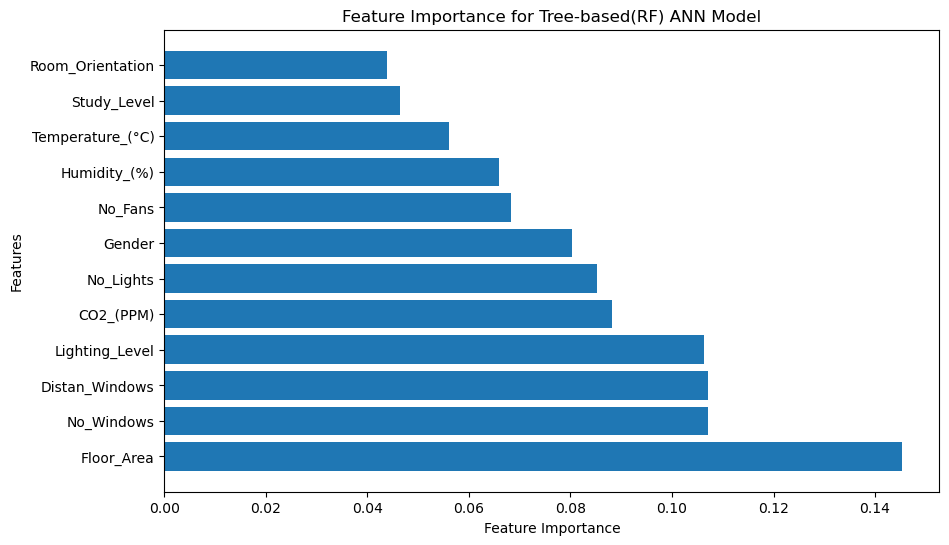

In [132]:
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
feature_importances = tree_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top features based on importance
num_features_to_select = 12  # Number of features to select
selected_feature_indices = sorted_indices[:num_features_to_select]

# Select the corresponding feature names
selected_feature_names = inputs.columns[selected_feature_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(num_features_to_select), feature_importances[selected_feature_indices], align='center')
plt.yticks(range(num_features_to_select), selected_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Tree-based(RF) ANN Model')
plt.show()

In [133]:
# Get feature importances from the Random Forest model
feature_importances = tree_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top features based on importance
num_features_to_select = 15  # Number of features to select
selected_feature_indices = sorted_indices[:num_features_to_select]

# Select the corresponding feature names
selected_feature_names = inputs.columns[selected_feature_indices]

# Print the feature importances
print("Feature Importance - Random Forest:")
for name, importance in zip(selected_feature_names, feature_importances[selected_feature_indices]):
    print(f"{name}: {importance:.4f}")

Feature Importance - Random Forest:
Floor_Area: 0.1454
No_Windows: 0.1070
Distan_Windows: 0.1070
Lighting_Level: 0.1063
CO2_(PPM): 0.0882
No_Lights: 0.0853
Gender: 0.0803
No_Fans: 0.0683
Humidity_(%): 0.0658
Temperature_(°C): 0.0561
Study_Level: 0.0464
Room_Orientation: 0.0438


In [134]:
import plotly.graph_objects as go

# Create a bar plot using Plotly
fig = go.Figure()

# Add horizontal bar chart trace
fig.add_trace(go.Bar(
    x=feature_importances[selected_feature_indices],
    y=selected_feature_names,
    orientation='h',
    marker=dict(color='blue')
))

# Update layout
fig.update_layout(
    title='Feature Importance for Tree-based(RF) ANN Model',
    xaxis_title='Feature Importance',
    yaxis_title='Features',
    height=500,
    width=800,
    bargap=0.1
)

# Display the plot
fig.show()

In [135]:
import plotly.graph_objects as go

# Create a bar plot using Plotly
fig = go.Figure()

# Add horizontal bar chart trace
fig.add_trace(go.Bar(
    x=[0.1454, 0.1070, 0.1070, 0.1063, 0.0882, 0.0853, 0.0803, 0.0683, 0.0658, 0.0561, 0.0464, 0.0438],
    y=['Floor_Area', 'No_Windows', 'Distan_Windows', 'Lighting_Level', 'CO2_(PPM)', 'No_Lights', 'Gender', 'No_Fans', 'Humidity_(%)', 'Temperature_(°C)', 'Study_Level', 'Room_Orientation'],
    orientation='h',
    marker=dict(color='blue')
))

# Update layout
fig.update_layout(
    title='Feature Importance for Tree-based (RF) ANN Model',
    xaxis_title='Feature Importance',
    yaxis_title='Features',
    height=500,
    width=800,
    bargap=0.1
)

# Reverse the y-axis to start with the highest rank at the top
fig.update_yaxes(autorange="reversed")

# Display the plot
fig.show()

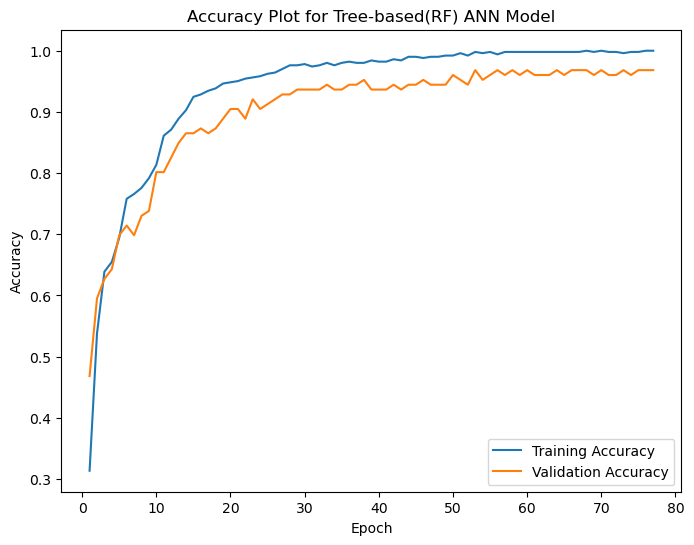

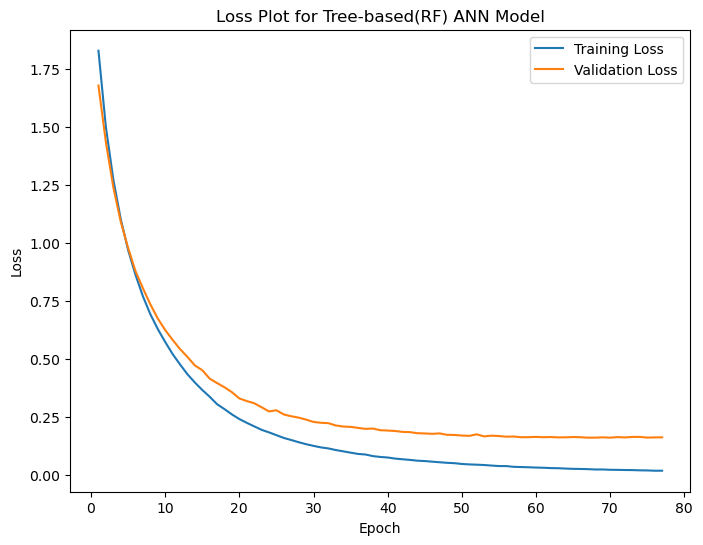

In [136]:
import matplotlib.pyplot as plt

# Get accuracy and loss values from the training history
accuracy = history_tree.history['accuracy']
val_accuracy = history_tree.history['val_accuracy']
loss = history_tree.history['loss']
val_loss = history_tree.history['val_loss']

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Plot for Tree-based(RF) ANN Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss Plot for Tree-based(RF) ANN Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Feature Selection by Lasso using ANN

In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import keras
import plotly.graph_objects as go
from sklearn.linear_model import Lasso

# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Separate inputs and target variable

inputs = df.drop(['PMV_Level'], axis='columns')
target = df['PMV_Level']

# Apply Lasso regularization for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(inputs, target)

# Get the selected features and their coefficients
selected_features = inputs.columns[lasso.coef_ != 0]
feature_coefficients = lasso.coef_[lasso.coef_ != 0]

# Create a DataFrame for the selected features and coefficients
feature_df = pd.DataFrame({'Selected Features': selected_features, 'Coefficients': feature_coefficients})

# Plot the feature coefficients using horizontal bar plot
fig = go.Figure(data=[go.Bar(y=feature_df['Selected Features'], x=feature_df['Coefficients'], orientation='h')])
fig.update_layout(yaxis=dict(title='Selected Features'), xaxis=dict(title='Coefficients'), title='Selected Features - Lasso Regularization')
fig.show()

# Filter the inputs based on selected features
inputs_selected = inputs[selected_features]

# Apply SMOTE-ENN for balancing the classes
resample = SMOTEENN(random_state=42)
X_resampled, y_resampled = resample.fit_resample(inputs_selected, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the number of input features
input_dim = X_train_scaled.shape[1]

# Define the number of output classes
num_classes = len(np.unique(y_train))

# Define the neural network model
model = Sequential()
model.add(Input(shape=(input_dim,)))  # Use Input layer instead of specifying input shape
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
history_lasso = model.fit(X_train_scaled, keras.utils.to_categorical(y_train, num_classes),
                    validation_data=(X_test_scaled, keras.utils.to_categorical(y_test, num_classes)),
                    epochs=100, callbacks=[early_stopping])



Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1226 - loss: 2.0343 - val_accuracy: 0.3889 - val_loss: 1.6755
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5236 - loss: 1.5816 - val_accuracy: 0.5648 - val_loss: 1.4225
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6761 - loss: 1.3380 - val_accuracy: 0.5833 - val_loss: 1.2637
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7593 - loss: 1.0722 - val_accuracy: 0.5926 - val_loss: 1.1471
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7500 - loss: 0.9126 - val_accuracy: 0.5926 - val_loss: 1.0305
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7679 - loss: 0.8305 - val_accuracy: 0.6204 - val_loss: 0.9056
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7838 - loss: 0.7356 - val_accuracy: 0.6574 - val_loss: 0.8057
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7992 - loss: 0.6400 - val_accuracy: 0.7222 - 

In [159]:
import plotly.graph_objects as go

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import keras
import plotly.graph_objects as go
from sklearn.linear_model import Lasso

# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Separate inputs and target variable
inputs = df.drop(['PMV_Level',], axis='columns')
target = df['PMV_Level']

# Apply Lasso regularization for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(inputs, target)

# Get the selected features and their coefficients
selected_features = inputs.columns[lasso.coef_ != 0]
feature_coefficients = lasso.coef_[lasso.coef_ != 0]

# Create a DataFrame for the selected features and coefficients
feature_df = pd.DataFrame({'Selected Features': selected_features, 'Coefficients': feature_coefficients})

# Plot the feature coefficients using horizontal bar plot
fig = go.Figure(data=[go.Bar(y=feature_df['Selected Features'], x=feature_df['Coefficients'], orientation='h')])
fig.update_layout(yaxis=dict(title='Selected Features'), xaxis=dict(title='Coefficients'), title='Selected Features - Lasso Regularization')

# Add text annotations for feature values
fig.update_layout(
    annotations=[
        go.layout.Annotation(
            x=coeff,
            y=feat,
            text=f"{feat}: {coeff:.4f}",
            showarrow=False,
            font=dict(color='black', size=12),
            xshift=5,
            yshift=0
        ) for feat, coeff in zip(feature_df['Selected Features'], feature_df['Coefficients'])
    ]
)

fig.show()

In [160]:
# Iterate over the DataFrame rows to get the feature values
feature_values = []
for _, row in feature_df.iterrows():
    feature_name = row['Selected Features']
    coefficient = row['Coefficients']
    feature_values.append(f"{feature_name}: {coefficient:.4f}")

# Join the feature values into a single string
feature_values_text = "\n".join(feature_values)

# Print the feature values
print("Feature Values:")
print(feature_values_text)

Feature Values:
Gender: 0.0018
Age: 0.2612
Study_Level: -0.0835
Floor_Level: 0.0003
Room_Orientation: -0.0359
No_Lights: -0.0000
No_Fans: -0.0161
No_Windows: 0.0366
Floor_Area: 0.0097
Temperature_(°C): -0.0458
Humidity_(%): -0.0156
CO2_(PPM): 0.0520
Lighting_Level: 0.0145


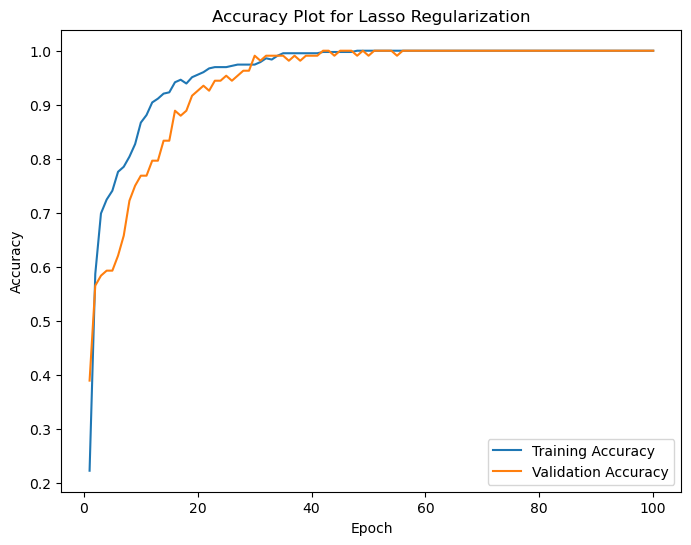

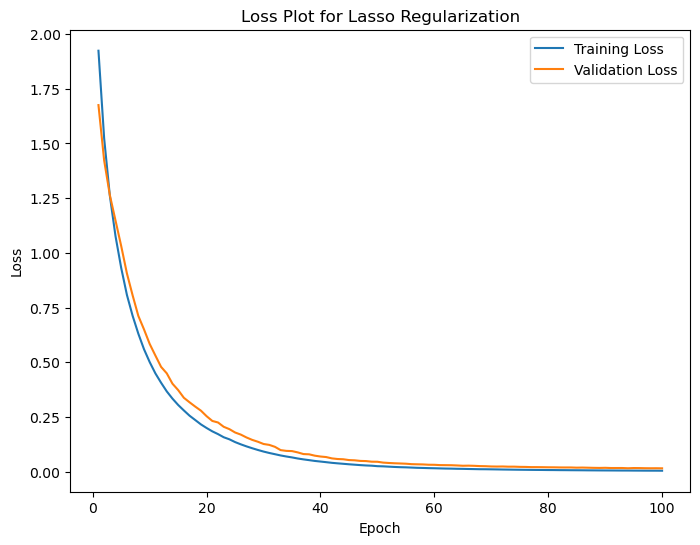

In [161]:
import matplotlib.pyplot as plt

# Get accuracy and loss values from the training history
accuracy = history_lasso.history['accuracy']
val_accuracy = history_lasso.history['val_accuracy']
loss = history_lasso.history['loss']
val_loss = history_lasso.history['val_loss']

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Plot for Lasso Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss Plot for Lasso Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ANN-RFE (Artificial Neural Network - Recursive Feature Elimination) approach
"Feature Ranking - Importance Scores (Model: Neural Network)"

In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from imblearn.combine import SMOTETomek
from sklearn.feature_selection import RFE
from imblearn.combine import SMOTEENN


# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Separate inputs and target variable
inputs = df.drop(['PMV_Level','Room_No', 'No_Doors', 'Age'], axis='columns')
target = df['PMV_Level']

# Apply SMOTE-Tomek Links for balancing the classes
resample = SMOTEENN(random_state=42)
X_resampled, y_resampled = resample.fit_resample(inputs, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using ANN-RFE
num_classes = len(np.unique(y_train))  # Number of output classes
num_features_to_select = 5  # Set the desired number of features to select

# Initialize the ANN classifier
ann_clf = Sequential()
ann_clf.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
ann_clf.add(Dense(64, activation='relu'))
ann_clf.add(Dense(num_classes, activation='softmax'))

# ...

# Create a mask to track selected features
feature_mask = np.ones(X_train_scaled.shape[1], dtype=bool)

# ...

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

import plotly.graph_objects as go

# Train the final ANN model with the selected features
final_ann_clf = Sequential()
final_ann_clf.add(Dense(64, activation='relu', input_dim=np.sum(feature_mask)))
final_ann_clf.add(Dense(64, activation='relu'))
final_ann_clf.add(Dense(num_classes, activation='softmax'))

final_ann_clf.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_selected = X_train_scaled[:, feature_mask]
X_test_selected = X_test_scaled[:, feature_mask]

early_stop = EarlyStopping(patience=10)  # Define EarlyStopping callback

history_rfe = final_ann_clf.fit(X_train_selected, y_train, validation_data=(X_test_selected, y_test),
                            epochs=50, callbacks=[early_stop])

X_train_scaled shape: (504, 12)
X_test_scaled shape: (126, 12)
Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3389 - loss: 1.8368 - val_accuracy: 0.4762 - val_loss: 1.6057
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5036 - loss: 1.4741 - val_accuracy: 0.5952 - val_loss: 1.3619
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5688 - loss: 1.2604 - val_accuracy: 0.6111 - val_loss: 1.1813
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6955 - loss: 1.0386 - val_accuracy: 0.6905 - val_loss: 1.0387
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7246 - loss: 0.9311 - val_accuracy: 0.7063 - val_loss: 0.9339
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7657 - loss: 0.8166 - val_accuracy: 0.7222 - val_loss: 0.8401
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8081 - loss: 0.7083 - val_accuracy: 0.7302 - val_loss: 0.7732
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8124 - loss: 0.6271 - val_accuracy: 0.7619 - val_loss: 0.7024
Ep

In [142]:
# Retrieve the weights of the first layer
weights = final_ann_clf.get_weights()[0]

# Compute the feature importance scores
feature_importance = np.sum(np.abs(weights), axis=1)

# Sort the features based on their importance scores
sorted_features = np.argsort(feature_importance)[::-1]

# Print the feature importance scores and corresponding feature names
for i, feature_index in enumerate(sorted_features):
    feature_name = inputs.columns[feature_index]
    importance_score = feature_importance[feature_index]
    print(f"Feature {i+1}: {feature_name} ({importance_score})")

Feature 1: Lighting_Level (15.121806144714355)
Feature 2: Distan_Windows (15.100189208984375)
Feature 3: Room_Orientation (14.573291778564453)
Feature 4: No_Windows (14.359965324401855)
Feature 5: Gender (13.331557273864746)
Feature 6: No_Lights (12.833213806152344)
Feature 7: Study_Level (12.540203094482422)
Feature 8: Temperature_(°C) (11.835644721984863)
Feature 9: Floor_Area (11.582844734191895)
Feature 10: No_Fans (11.142242431640625)
Feature 11: Humidity_(%) (11.095037460327148)
Feature 12: CO2_(PPM) (10.84011459350586)


In [143]:
import plotly.graph_objects as go

# Retrieve the weights of the first layer
weights = final_ann_clf.get_weights()[0]

# Compute the feature importance scores
feature_importance = np.sum(np.abs(weights), axis=1)

# Sort the features based on their importance scores
sorted_features = np.argsort(feature_importance)[::-1]

# Get the feature names and importance scores
feature_names = [inputs.columns[feature_index] for feature_index in sorted_features]
importance_scores = [feature_importance[feature_index] for feature_index in sorted_features]

# Create the horizontal bar plot
fig = go.Figure(data=go.Bar(
    x=importance_scores,
    y=feature_names,
    orientation='h'
))

# Customize the layout
fig.update_layout(
    xaxis=dict(title='Importance Score'),
    yaxis=dict(title='Feature'),
    title='Feature Importance_Recursive Feature Elimination'
)

# Show the interactive plot
fig.show()

In [144]:
import plotly.graph_objects as go

# Retrieve the weights of the first layer
weights = final_ann_clf.get_weights()[0]

# Compute the feature importance scores
feature_importance = np.sum(np.abs(weights), axis=1)

# Sort the features based on their importance scores in descending order
sorted_features = np.argsort(feature_importance)[::-1]

# Get the feature names and importance scores
feature_names = [inputs.columns[feature_index] for feature_index in sorted_features]
importance_scores = [feature_importance[feature_index] for feature_index in sorted_features]

# Create the horizontal bar plot
fig = go.Figure(data=go.Bar(
    x=importance_scores,
    y=feature_names,
    orientation='h'
))

# Customize the layout
fig.update_layout(
    xaxis=dict(title='Importance Score'),
    yaxis=dict(title='Feature'),
    title='Feature Importance_Recursive Feature Elimination'
)

# Reverse the y-axis to start with the highest importance at the top
fig.update_yaxes(autorange="reversed")

# Show the interactive plot
fig.show()

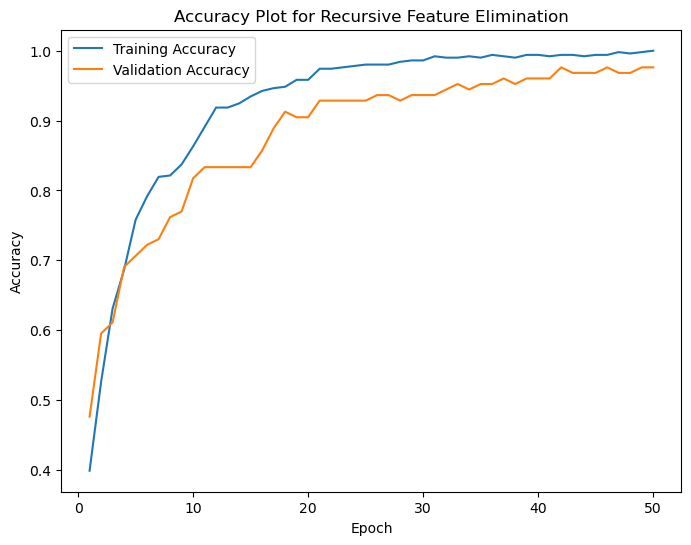

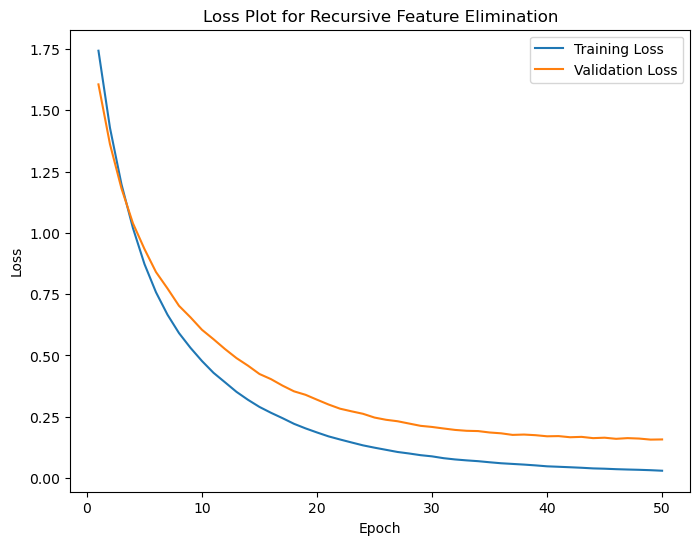

In [145]:
import matplotlib.pyplot as plt

# Get accuracy and loss values from the training history
accuracy = history_rfe.history['accuracy']
val_accuracy = history_rfe.history['val_accuracy']
loss = history_rfe.history['loss']
val_loss = history_rfe.history['val_loss']

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Plot for Recursive Feature Elimination')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss Plot for Recursive Feature Elimination')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# ANN_Information Gain or Mutual Information (Feature Selection)

In [146]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from imblearn.combine import SMOTEENN

# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Separate inputs and target variable
inputs = df.drop(['PMV_Level','Room_No', 'No_Doors', 'Age'], axis='columns')
target = df['PMV_Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE-ENN to handle imbalanced data
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Define the number of input features
input_dim = X_train_resampled.shape[1]

# Define the number of output classes
num_classes = len(np.unique(y_train_resampled))

# Define the neural network model
model = Sequential()
model.add(Input(shape=(input_dim,)))  # Use Input layer instead of specifying input shape
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X_train_resampled, keras.utils.to_categorical(y_train_resampled, num_classes),
          validation_data=(X_test_scaled, keras.utils.to_categorical(y_test, num_classes)),
          epochs=100, callbacks=[early_stopping])

# Get the feature importance scores using mutual information or information gain
feature_scores = mutual_info_classif(X_train_resampled, y_train_resampled)

# Create a DataFrame to store the feature scores
feature_df = pd.DataFrame({'Features': X_train.columns, 'Scores': feature_scores})

# Sort the DataFrame by feature scores in descending order
feature_df = feature_df.sort_values(by='Scores', ascending=False)

# Plot the feature scores using an interactive bar plot
fig = px.bar(feature_df, x='Features', y='Scores', title='Feature Importance Scores')
fig.show()

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2916 - loss: 1.8120 - val_accuracy: 0.0459 - val_loss: 2.4739
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5593 - loss: 1.4248 - val_accuracy: 0.0688 - val_loss: 2.7745
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6670 - loss: 1.1807 - val_accuracy: 0.1376 - val_loss: 2.8556
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6996 - loss: 1.0454 - val_accuracy: 0.1651 - val_loss: 2.8398
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7255 - loss: 0.8819 - val_accuracy: 0.1651 - val_loss: 2.8791
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7358 - loss: 0.7944 - val_accuracy: 0.1743 - val_loss: 2.8665
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7797 - loss: 0.6883 - val_accuracy: 0.1789 - val_loss: 2.8924
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8353 - loss: 0.6172 - val_accuracy: 0.1835 - 

# ANN_Co-relation (Feature Selection)

In [147]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from imblearn.combine import SMOTEENN
from keras import regularizers
# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Separate inputs and target variable
inputs = df.drop(['PMV_Level'], axis='columns')
target = df['PMV_Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE-ENN to handle imbalanced data
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Define the number of input features
input_dim = X_train_resampled.shape[1]

# Define the number of output classes
num_classes = len(np.unique(y_train_resampled))

from keras.layers import Dropout

model.add(Dropout(0.5))  # Add dropout after each dense layer
# Define the neural network model
model = Sequential()
model.add(Input(shape=(input_dim,)))  # Use Input layer instead of specifying input shape
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X_train_resampled, keras.utils.to_categorical(y_train_resampled, num_classes),
          validation_data=(X_test_scaled, keras.utils.to_categorical(y_test, num_classes)),
          epochs=50, callbacks=[early_stopping])

# Perform feature selection based on correlations
selector = SelectKBest(score_func=f_classif, k=15)  # Choose the number of top features to select
selector.fit(X_train_resampled, y_train_resampled)
feature_scores = selector.scores_

# Create a DataFrame to store the feature scores
feature_df = pd.DataFrame({'Features': X_train.columns, 'Scores': feature_scores})

# Sort the DataFrame by feature scores in descending order
feature_df = feature_df.sort_values(by='Scores', ascending=False)

# Plot the feature scores using an interactive bar plot
fig = px.bar(feature_df, x='Features', y='Scores', title='Feature Importance Scores')
fig.show()

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3080 - loss: 2.0066 - val_accuracy: 0.0275 - val_loss: 2.5461
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6149 - loss: 1.5090 - val_accuracy: 0.0550 - val_loss: 2.8293
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6774 - loss: 1.2830 - val_accuracy: 0.1239 - val_loss: 2.9272
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7092 - loss: 1.1338 - val_accuracy: 0.1560 - val_loss: 2.8831
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7701 - loss: 0.9688 - val_accuracy: 0.1606 - val_loss: 2.9486
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7759 - loss: 0.9318 - val_accuracy: 0.1743 - val_loss: 2.9545
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8415 - loss: 0.7896 - val_accuracy: 0.1789 - val_loss: 2.9736
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8475 - loss: 0.7474 - val_accuracy: 0.1881 - val_loss

In [148]:
# Create nodes and links for the Sankey diagram
nodes = [{'label': 'Input Layer'}]
for i in range(len(model.layers) - 1):
    nodes.append({'label': f'Hidden Layer {i + 1}'})
    
nodes.append({'label': 'Output Layer'})

links = []
for i in range(len(nodes) - 1):
    links.append({'source': i, 'target': i + 1, 'value': model.layers[i].units})

# Create the Sankey diagram figure
fig = go.Figure(data=[go.Sankey(
    node=dict(label=[node['label'] for node in nodes]),
    link=dict(source=[link['source'] for link in links],
              target=[link['target'] for link in links],
              value=[link['value'] for link in links])
)])

# Set the layout and title of the figure
fig.update_layout(title_text='Artificial Neural Network (ANN) Architecture')

# Display the Sankey diagram
fig.show()

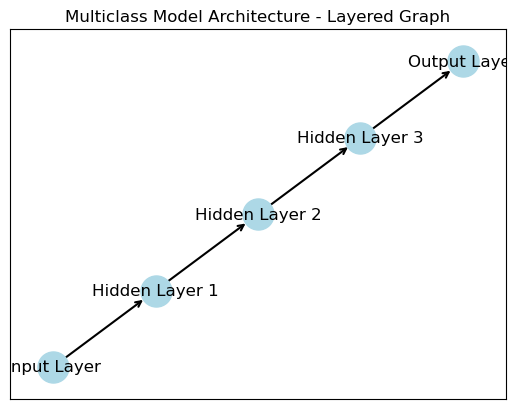

In [149]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new networkx graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_node("Input Layer")
for i in range(len(model.layers)):
    G.add_node(f"Hidden Layer {i+1}")
G.add_node("Output Layer")

# Add edges to connect the nodes
G.add_edge("Input Layer", "Hidden Layer 1")
for i in range(len(model.layers) - 1):
    G.add_edge(f"Hidden Layer {i+1}", f"Hidden Layer {i+2}")
G.add_edge(f"Hidden Layer {len(model.layers)}", "Output Layer")

# Set the positions for the nodes in each layer
pos = {}
for i, layer in enumerate(G.nodes()):
    pos[layer] = (i, i)

# Draw the graph
nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color='lightblue',
                 arrows=True, arrowstyle='->', width=1.5)

# Set the figure title
plt.title("Multiclass Model Architecture - Layered Graph")

# Display the graph
plt.show()

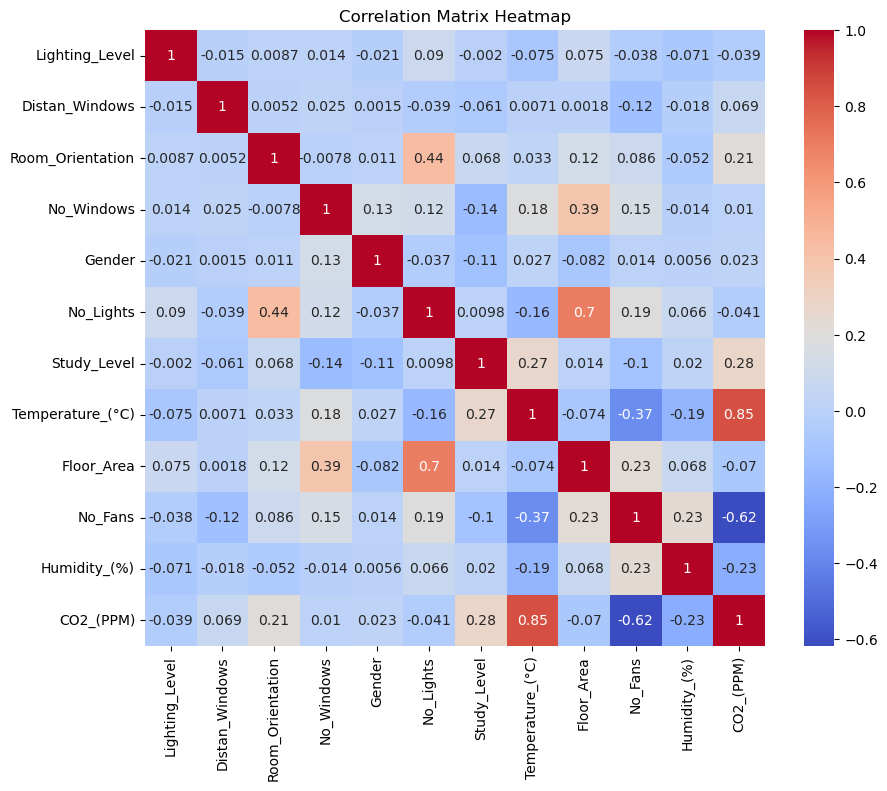

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe with the feature names and their values
df_features = pd.DataFrame(inputs, columns=feature_names)

# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

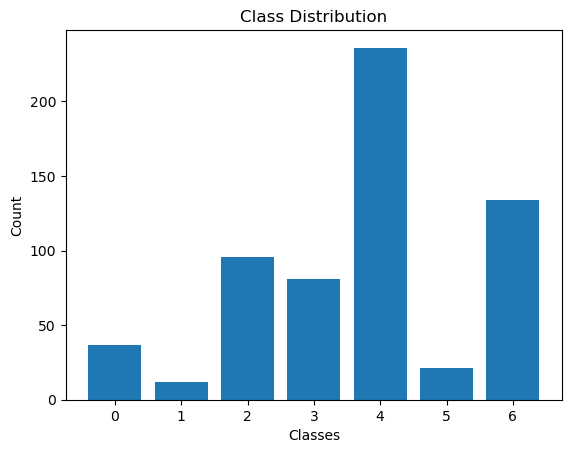

In [151]:
import matplotlib.pyplot as plt

classes = [4, 6, 2, 3, 0, 5, 1]
counts = [236, 134, 96, 81, 37, 21, 12]

plt.bar(classes, counts)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')

plt.show()

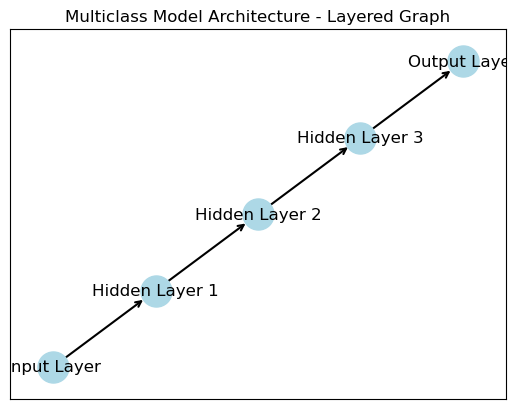

In [152]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new networkx graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_node("Input Layer")
for i in range(len(model.layers)):
    G.add_node(f"Hidden Layer {i+1}")
G.add_node("Output Layer")

# Add edges to connect the nodes
G.add_edge("Input Layer", "Hidden Layer 1")
for i in range(len(model.layers) - 1):
    G.add_edge(f"Hidden Layer {i+1}", f"Hidden Layer {i+2}")
G.add_edge(f"Hidden Layer {len(model.layers)}", "Output Layer")

# Set the positions for the nodes in each layer
pos = {}
layer_positions = range(len(G.nodes))
for i, layer in enumerate(G.nodes()):
    pos[layer] = (i, layer_positions[i])

# Draw the graph
nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color='lightblue',
                 arrows=True, arrowstyle='->', width=1.5)

# Set the figure title
plt.title("Multiclass Model Architecture - Layered Graph")

# Display the graph
plt.show()